# Project Introduction:
**Titanic Dataset:**

This notebook aims to explore the Titanic dataset to gain insights into passenger characteristics and understand the factors that influence survival.

**Goals**:
- Understand dataset structure
- Handle missing values
- Explore relationships between variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid', palette='pastel')

# Data Overview

In [2]:
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


First, we examine the data in general:

In [3]:
titanic.shape

(1309, 14)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


Based on the information above, we have 14 columns and 1309 rows.

In [5]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
titanic.isnull().sum().sort_values()

pclass          0
survived        0
name            0
sex             0
sibsp           0
parch           0
ticket          0
fare            1
embarked        2
age           263
home.dest     564
boat          823
cabin        1014
body         1188
dtype: int64

# Handling Missing Values

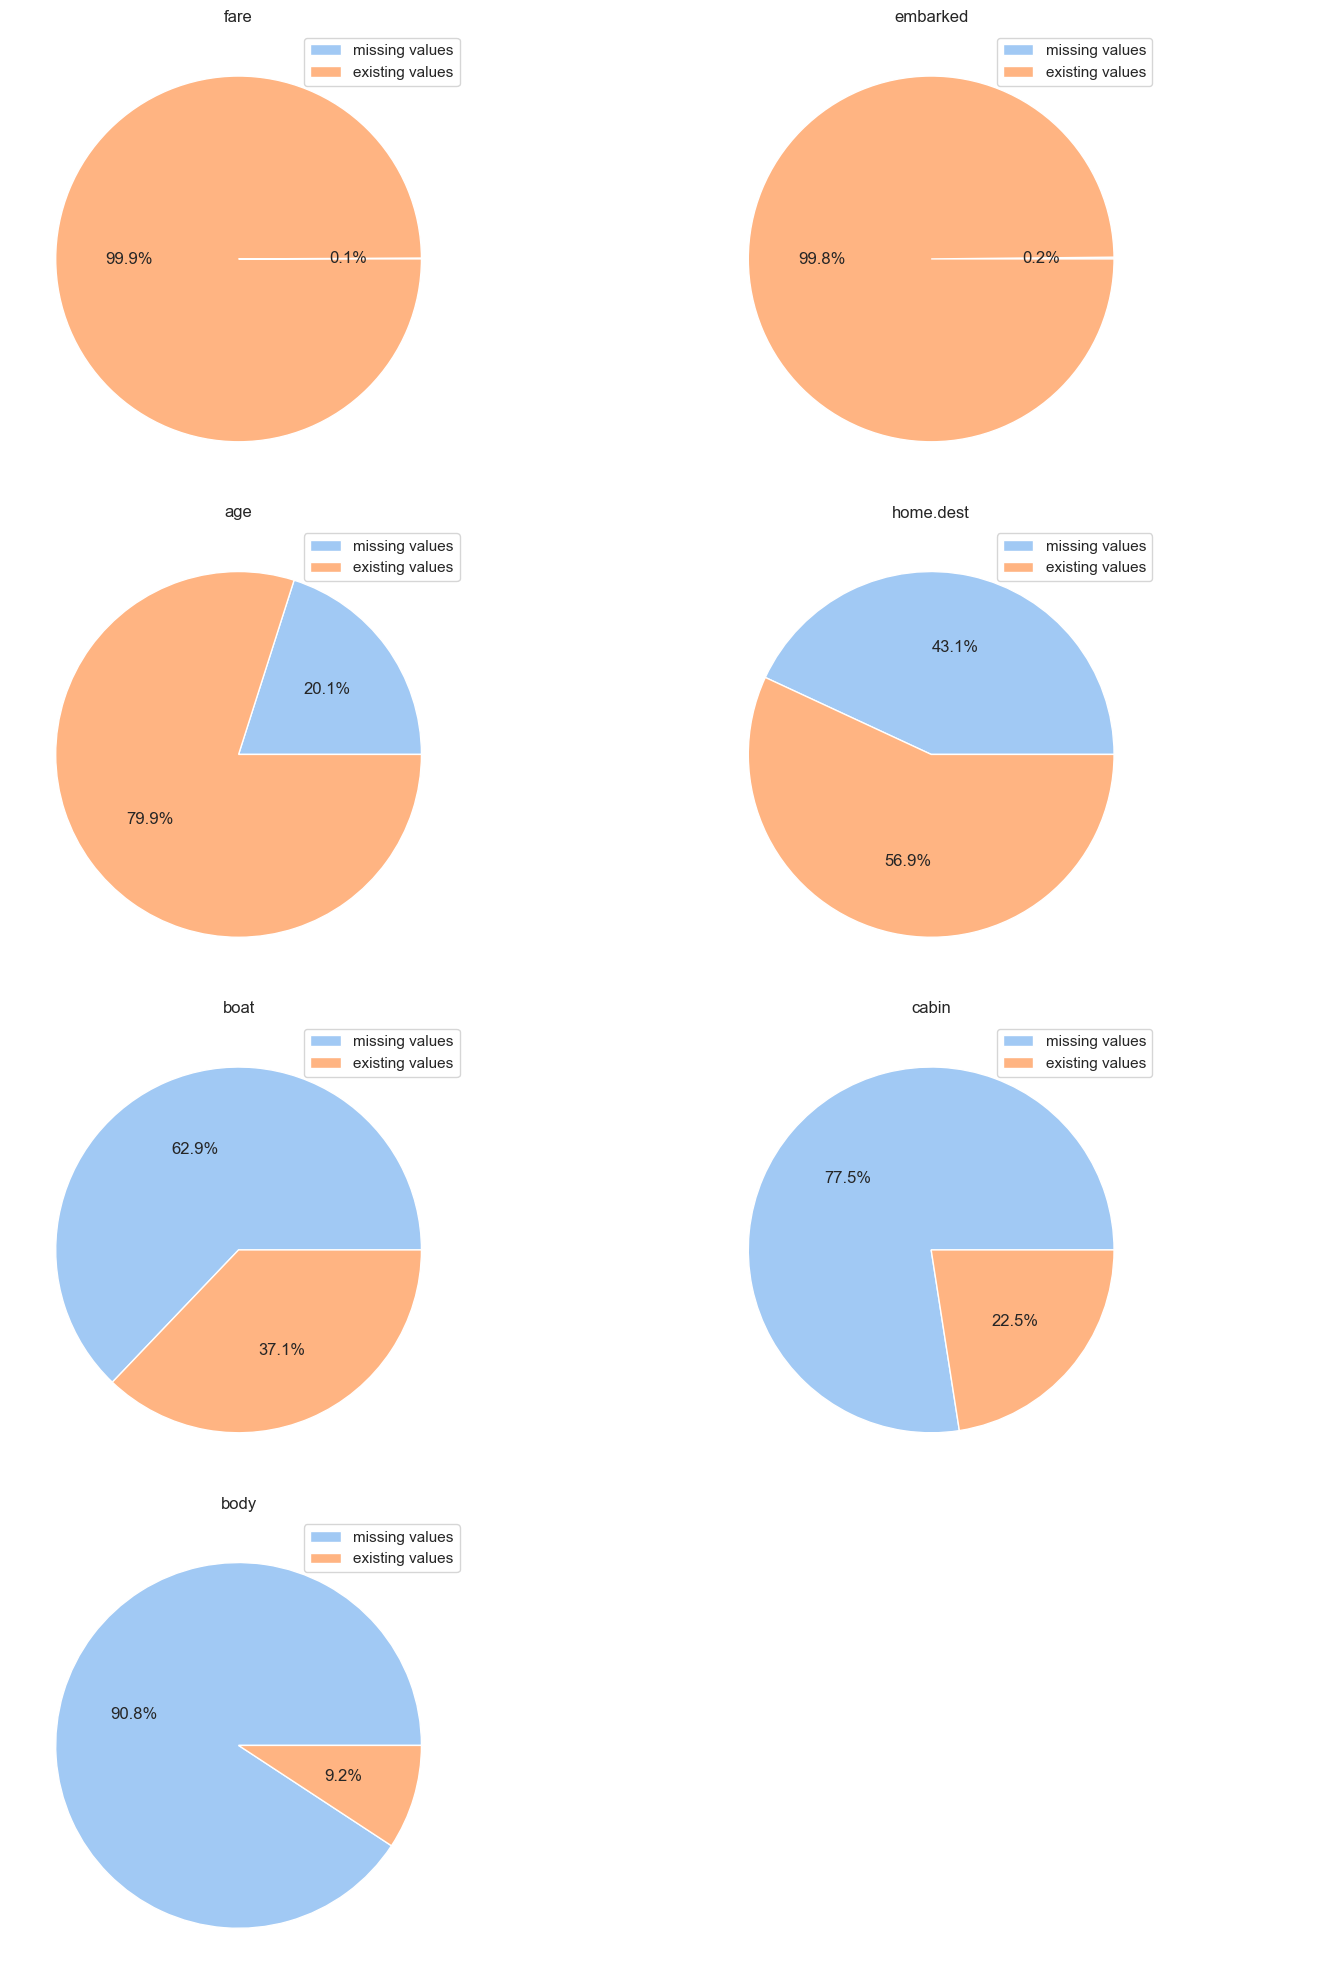

In [7]:
columns = ['fare', 'embarked', 'age', 'home.dest', 'boat', 'cabin', 'body']
rows = (len(columns) + 1)//2
fig, ax = plt.subplots(rows, 2, figsize=(15, 5*rows))
ax = ax.flatten()

for col, col_name in enumerate(columns):
    ax[col].pie([titanic[f'{col_name}'].isnull().sum(), titanic[f'{col_name}'].notnull().sum()], autopct='%1.1f%%')
    ax[col].set_title(f'{col_name}')
    ax[col].legend(labels=['missing values', 'existing values'], loc='upper right')

for i in range(col+1, len(ax)):
    ax[i].axis('off')
    
plt.tight_layout()

Based on the above result, about 0.1% of passengers do not have their fare's information available, about 0.2% of passengers do not have their embarked's information available, about 20% of passengers do not have their age's information available, about 43% of passengers do not have their home address's information available, baout 63% of passengers do not have their boat's information available, about 77.5% of passengers do not have their cabin's information available, and about 91% of passengers do not have their body's information available.

For managing the missing values, delete the "cabin", "boat", and "body" columns, because they have a lot of missing values, and delete the "home.dest" column because it is unnecessary info. Fill the missing values in the "age" and "fare" columns with their median because of skewed distribution, and the "embarked" column with its mode, the most frequent port.

# Data cleaning

In [8]:
titanic.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)
titanic.fillna({'age': titanic.age.median(), 'fare': titanic.fare.median(), 'embarked': titanic.embarked.mode()[0]}, inplace=True)

In [9]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.503186,0.498854,0.385027,33.281086
std,0.837836,0.486055,12.905241,1.041658,0.865560,51.741500
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


The average age is about 30 years old and the average fare ticket is about 33 pounds.

# Data Visualization

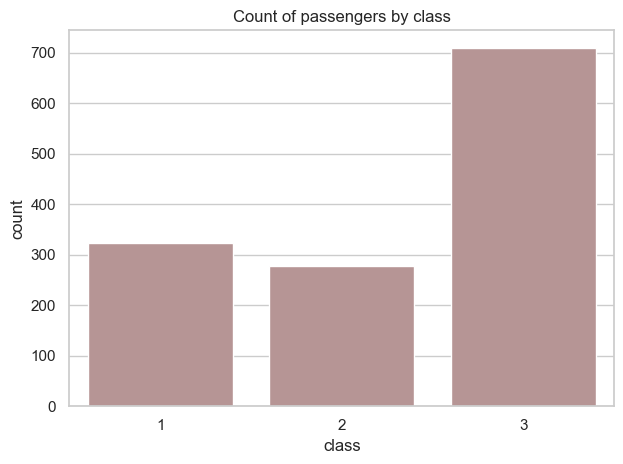

In [10]:
ax = sns.countplot(x='pclass', data=titanic, color='rosybrown')
ax.set(xlabel= 'class')
ax.set_title('Count of passengers by class')
plt.tight_layout()
plt.show()

Based on the above information, most of the passengers were in the third-class.

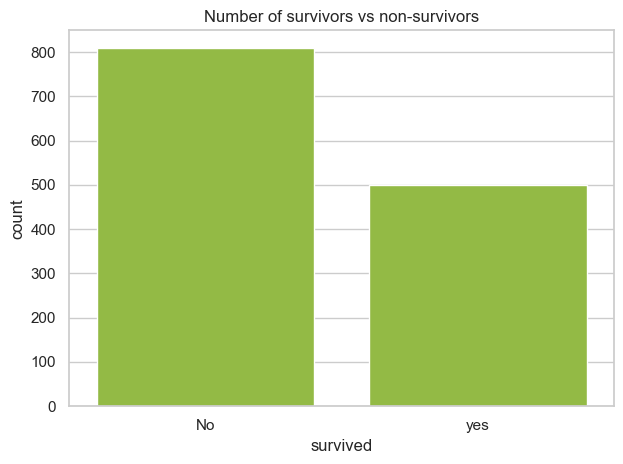

In [11]:
ax = sns.countplot(x='survived', data=titanic, color='yellowgreen')
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels(['No', 'yes'])
ax.set_title("Number of survivors vs non-survivors")
plt.tight_layout()
plt.show()

Based on the information above, about 61% of passengers didn't survive.

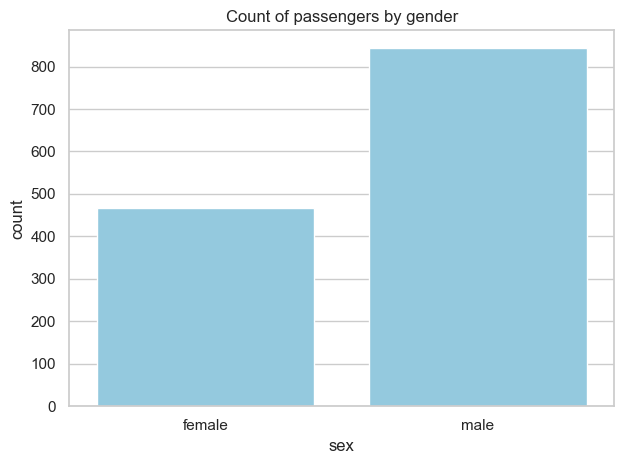

In [12]:
ax = sns.countplot(x='sex', data=titanic, color='skyblue')
ax.set_title('Count of passengers by gender')
plt.tight_layout()
plt.show()

Based on the information above, about 36% of passengers were women.

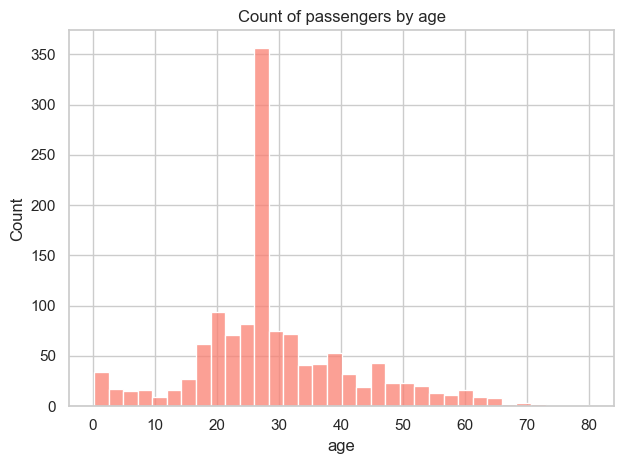

In [13]:
ax = sns.histplot(x='age', data=titanic, color='salmon')
ax.set_title('Count of passengers by age')
plt.tight_layout()
plt.show()

Based on the above information, most of the passengers were between 20 to 30 and their mean was close to 30.

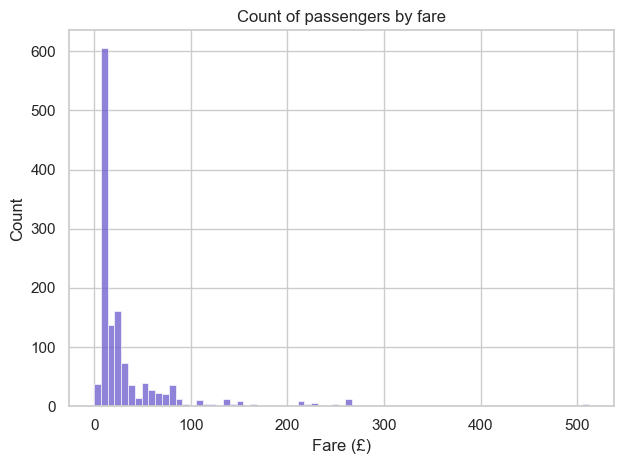

In [14]:
ax = sns.histplot(x='fare', data=titanic, color='slateblue')
ax.set_title('Count of passengers by fare')
ax.set_xlabel('Fare (£)')
plt.tight_layout()
plt.show()

Based on the information above, most of the passengers had a fare ticket of less than 100 pounds.

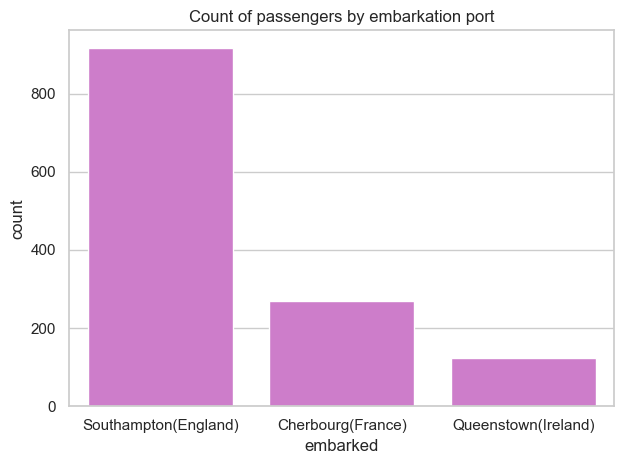

In [15]:
ax = sns.countplot(x='embarked', data=titanic,  color='orchid')
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels(['Southampton(England)', 'Cherbourg(France)', 'Queenstown(Ireland)'])
ax.set_title('Count of passengers by embarkation port')
plt.tight_layout()
plt.show()

Based on the information above, most of the passengers embarked from Southampton in England.

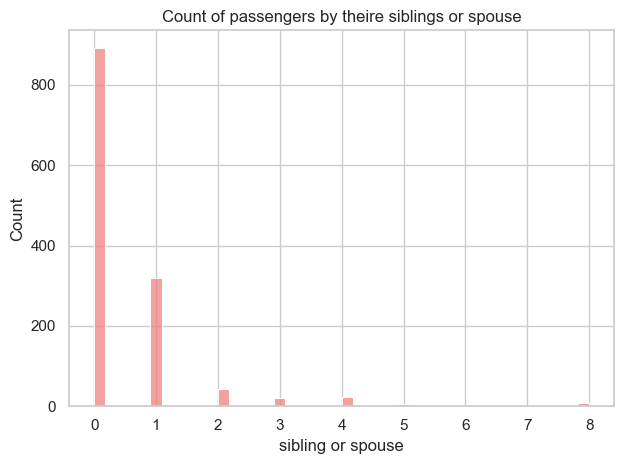

In [16]:
ax = sns.histplot(x='sibsp', data=titanic, color='lightcoral')
ax.set(xlabel='sibling or spouse')
ax.set_title('Count of passengers by theire siblings or spouse')
plt.tight_layout()
plt.show()

Based on the information, most of the passengers don't have any siblings or spouses in the ship.

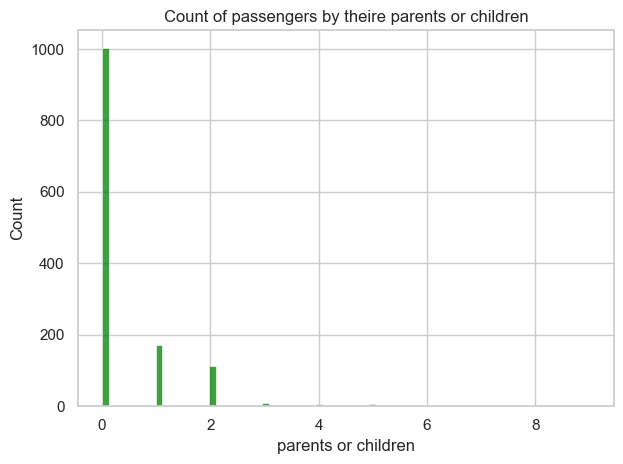

In [17]:
ax = sns.histplot(x='parch', data=titanic, color='green')
ax.set(xlabel='parents or children')
ax.set_title('Count of passengers by theire parents or children')
plt.tight_layout()
plt.show()

Based on the information, most of the passengers don't have any parents or children in the ship. 

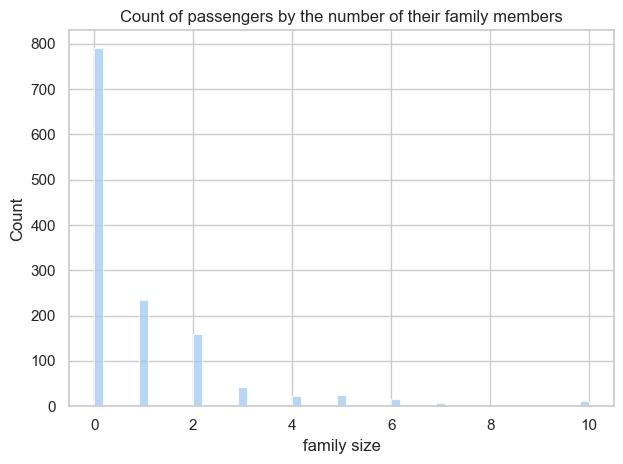

In [18]:
titanic['family size'] = titanic['parch'] + titanic['sibsp']
ax = sns.histplot(x='family size', data=titanic)
ax.set_title('Count of passengers by the number of their family members')
plt.tight_layout()
plt.show()

In general, most passengers traveled alone.

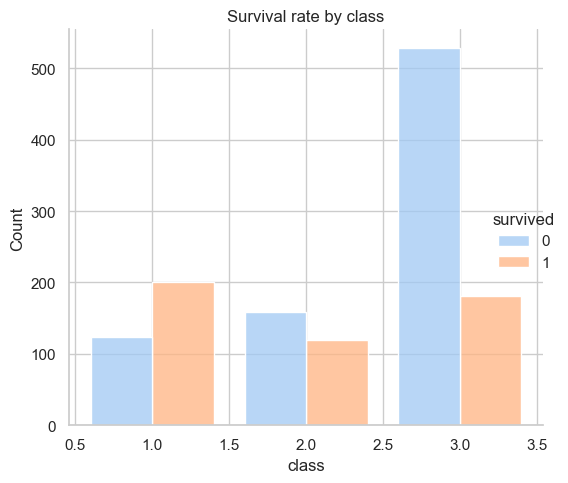

,pclass,survived,count
0,3,0,528
1,1,1,200
2,3,1,181
3,2,0,158
4,1,0,123
5,2,1,119


In [19]:
ax = sns.displot(x='pclass', hue='survived', data=titanic, multiple='dodge', discrete=True, shrink=0.8)
ax.set(title='Survival rate by class', xlabel='class')
plt.tight_layout()
plt.show()

titanic[['pclass', 'survived']].value_counts().reset_index()

Based on the provided data, approximately 62% of passengers in the first class survived, compared to about 43% in the second class and about 25.5% in the third class. Higher-class passengers had better survival chances.

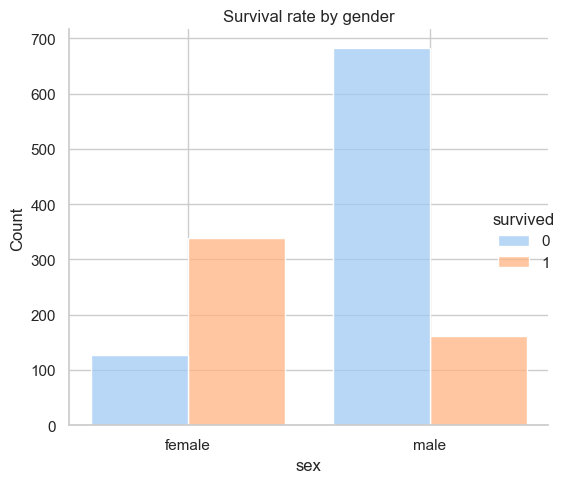

,sex,survived,count
0,male,0,682
1,female,1,339
2,male,1,161
3,female,0,127


In [20]:
ax = sns.displot(x='sex', hue='survived', data=titanic, multiple='dodge', shrink=0.8)
ax.set(title='Survival rate by gender')
plt.tight_layout()
plt.show()
titanic[['sex', 'survived']].value_counts().reset_index()

Based on the provided data, approximately 19% of male passengers and about 73% of female passengers survived. Females had a much higher survival rate compared to males, indicating gender was a strong survival factor.

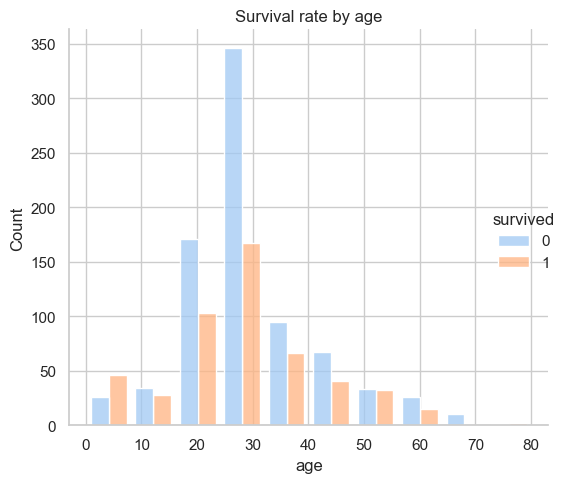

In [21]:
ax = sns.displot(x='age', hue='survived', data=titanic, multiple='dodge', bins=10, shrink=0.8)
ax.set(title='Survival rate by age')
plt.tight_layout()
plt.show()

Based on the provided data, for children under 10 years old, there was a higher chance of survival.

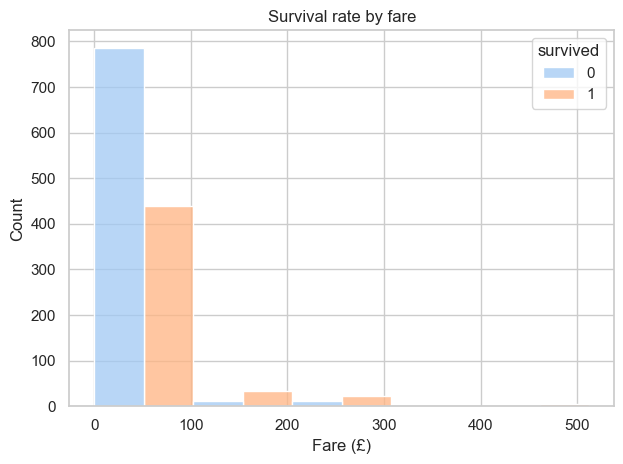

In [22]:
ax = sns.histplot(x='fare', hue='survived', data=titanic, multiple='dodge', bins=5)
ax.set(title='Survival rate by fare')
ax.set_xlabel('Fare (£)')
plt.tight_layout()
plt.show()

Based on the provided data, passengers with a fare ticket of more than 100 pounds had a higher chance of survival.

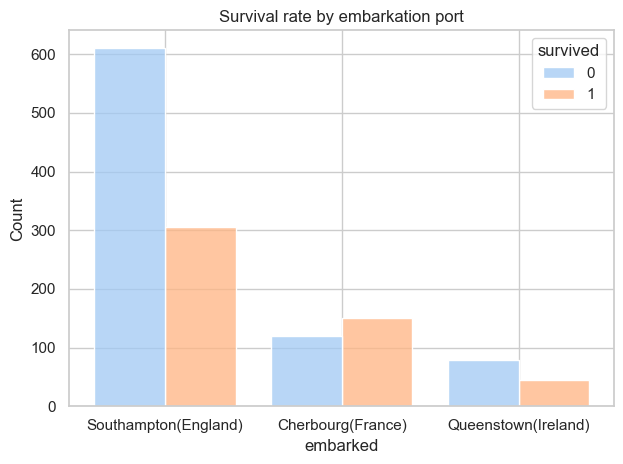

,embarked,survived,count
0,S,0,610
1,S,1,306
2,C,1,150
3,C,0,120
4,Q,0,79
5,Q,1,44


In [23]:
ax = sns.histplot(x='embarked', hue='survived', data=titanic, multiple='dodge', discrete=True, shrink=0.8)
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels(['Southampton(England)', 'Cherbourg(France)', 'Queenstown(Ireland)'])
ax.set_title('Survival rate by embarkation port')
plt.tight_layout()
plt.show()

titanic[['embarked', 'survived']].value_counts().reset_index()

Based on the information above, about 33.4% of passengers who embarked from Southampton in England were survived, about 55.5% of passengers who embarked from Cherbourg in France were survived, and about 35.7% of passengers who embarked from Queenstown in Ireland were survived.

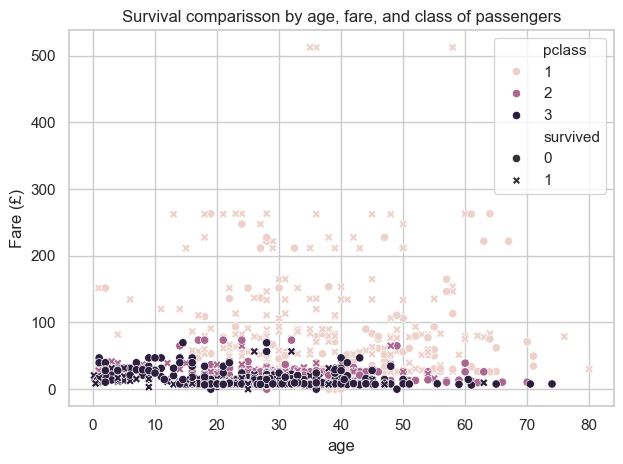

In [24]:
ax = sns.scatterplot(x='age', y='fare', hue='pclass', style='survived', data=titanic)
ax.set_title('Survival comparisson by age, fare, and class of passengers')
ax.set_ylabel('Fare (£)')
plt.tight_layout()
plt.show()

Based on the information above, first-class passengers generally paid higher fares and often had better survival rates. In contrast, third-class passengers paid lower fares and had lower survival rates.

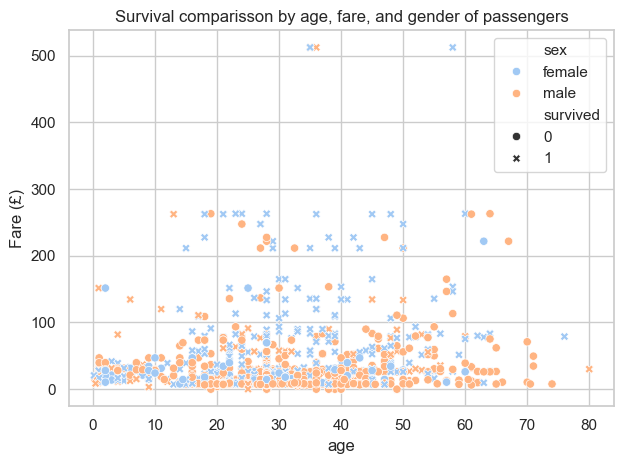

In [25]:
ax = sns.scatterplot(x='age', y='fare', hue='sex', style='survived', data=titanic)
ax.set_title('Survival comparisson by age, fare, and gender of passengers')
ax.set_ylabel('Fare (£)')
plt.tight_layout()
plt.show()

Based on the information above, women generally paid higher fares and had better survival rates. In contrast, male passengers paid lower fares and had lower survival rates.

# Insights and Conclusions

**Key Insights:**
- About 61% of passengers didn't survive.
- Most passengers were in the 3rd class.
- Females and children had higher survival rates.
- First-class passengers paid higher fares and were more likely to survive.